In [505]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
data1=pd.read_excel('C:\\Users\\fursa\\Desktop\\Тестовое\\Данные1.xlsx')
data2=pd.read_excel('C:\\Users\\fursa\\Desktop\\Тестовое\\Данные2.xlsx')
data3=pd.read_excel('C:\\Users\\fursa\\Desktop\\Тестовое\\Данные3.xlsx')
data4=pd.read_excel('C:\\Users\\fursa\\Desktop\\Тестовое\\Данные4.xlsx')
table1=pd.read_excel('C:\\Users\\fursa\\Desktop\\Тестовое\\РСТ1.xlsx')
table2=pd.read_excel('C:\\Users\\fursa\\Desktop\\Тестовое\\РСТ2.xlsx')
table3=pd.read_excel('C:\\Users\\fursa\\Desktop\\Тестовое\\РСТ3.xlsx')

# 1.1. В табл.1 разбейте адрес на составляющие(индекс, страна, ..)

In [506]:
data1.head()

,Регион,Клиент,Адрес,сумма продаж,статус
0,NaN,2 МПЗ ОАО,"119530, Россия, Москва г, Очаковское ш, д 16",NaN,NaN
1,NaN,3+3 фирма ООО,"127254, Россия, Москва г, Руставели ул, д 3, к 2",NaN,NaN
2,NaN,449 плюс СК ООО,"129338, Россия, Москва г, Вешних Вод ул, д 8, к 2",NaN,NaN
3,NaN,777 ТД ООО,"141506, Россия, Московская обл, Солнечногорски...",NaN,NaN
4,NaN,7-я ООО,"111672, Россия, Москва г, Салтыковская ул, д 45",NaN,NaN


Проверим, все ли адреса нам известны.

In [507]:
data1.isna().sum()

Регион          3027
Клиент             0
Адрес              1
сумма продаж    3027
статус          3027
dtype: int64

In [508]:
data1=data1.fillna({'Адрес':'Нет адреса'})

Из поля 'Адрес' создадим пандосовскую серию, в которой каждый элемент будет являться списком. Список в свою очередь состоит из элементов адреса, разделенных запятыми.

In [509]:
adr = data1['Адрес'].str.split(',')
adr

0       [119530,  Россия,  Москва г,  Очаковское ш,  д...
1       [127254,  Россия,  Москва г,  Руставели ул,  д...
2       [129338,  Россия,  Москва г,  Вешних Вод ул,  ...
3       [141506,  Россия,  Московская обл,  Солнечного...
4       [111672,  Россия,  Москва г,  Салтыковская ул,...
                              ...                        
3022    [123007,  Россия,  Москва г,  Силикатный 1-й п...
3023    [123007,  Россия,  Москва г,  Хорошевский 2-й ...
3024    [123458,  Россия,  Москва г,  Таллинская ул,  ...
3025    [109542,  Россия,  Москва г,  Рязанский пр-кт,...
3026    [129110,  Россия,  Москва г,  Олимпийский пр-к...
Name: Адрес, Length: 3027, dtype: object

Добавим в таблицу необходимые поля с элементами адреса.

In [510]:
data1['Индекс'] = ''
data1['Страна'] = ''
data1['Субъект(не включая города фед. значения)'] = ''
data1['Город'] = ''
data1['Район'] = ''
data1['Населенный_пункт'] = ''
data1['Улица'] = ''
data1['Дом'] = ''


In [511]:
data1.head()

,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Субъект(не включая города фед. значения),Город,Район,Населенный_пункт,Улица,Дом
0,NaN,2 МПЗ ОАО,"119530, Россия, Москва г, Очаковское ш, д 16",NaN,NaN,,,,,,,,
1,NaN,3+3 фирма ООО,"127254, Россия, Москва г, Руставели ул, д 3, к 2",NaN,NaN,,,,,,,,
2,NaN,449 плюс СК ООО,"129338, Россия, Москва г, Вешних Вод ул, д 8, к 2",NaN,NaN,,,,,,,,
3,NaN,777 ТД ООО,"141506, Россия, Московская обл, Солнечногорски...",NaN,NaN,,,,,,,,
4,NaN,7-я ООО,"111672, Россия, Москва г, Салтыковская ул, д 45",NaN,NaN,,,,,,,,


In [512]:
# с помощью цикла раскидаем элементы адреса по нужным полям
n=0
for i in adr:
    if i==['Нет адреса']:
        data1.at[n, 'Страна']=' '
    else:
        data1.at[n, 'Страна']=i[1] 
    for j in i:
            if i==['Нет адреса']:
                data1.at[n, 'Индекс']=' '
                continue
            if j.isdigit()==True and len(j)==6:
                data1.at[n, 'Индекс']=j
                continue
            if i==['Нет адреса']:
                data1.at[n, 'Город']=' '
                continue
            if ' г' in j and j[-1]=='г':
                data1.at[n, 'Город']=j
                continue
            if i==['Нет адреса']:
                data1.at[n, 'Район']=' '
                continue
            if 'р-н' in j:
                data1.at[n, 'Район']=j
                continue
            if i==['Нет адреса']:
                data1.at[n, 'Населенный_пункт']=' '
                continue
            if ' п' in j and j[-1]=='п' or ' пгт' in j and j[-1]=='пгт' or ' с' in j and j[-1]=='с' or ' д' in j and j[-1]=='д' or ' рп' in j and j[-1]=='рп' or ' дп' in j and j[-1]=='дп':
                data1.at[n, 'Населенный_пункт']=j
                continue
            if i==['Нет адреса']:
                data1.at[n, 'Улица']=' '
                continue
            if ' ул' in j or ' пер' in j or ' пр-кт' in j or ' городок' in j or ' пл' in j or ' тракт' in j or ' ш' in j or ' проезд' in j or 'наб' in j:
                data1.at[n, 'Улица']=j
                continue
            if i==['Нет адреса']:
                data1.at[n, 'Дом']=' '
                continue
            if 'д ' in j:
                data1.at[n, 'Дом']=j
                continue
            if i==['Нет адреса']:
                data1.at[n, 'Субъект(не включая города фед. значения)']=' '
                continue
            if ' обл' in j or ' край' in j or ' округ'  in j or ' республика' in j:
                data1.at[n, 'Субъект(не включая города фед. значения)']=j
                continue
    n+=1


In [513]:
data1

,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Субъект(не включая города фед. значения),Город,Район,Населенный_пункт,Улица,Дом
0,NaN,2 МПЗ ОАО,"119530, Россия, Москва г, Очаковское ш, д 16",NaN,NaN,119530,Россия,,Москва г,,,Очаковское ш,д 16
1,NaN,3+3 фирма ООО,"127254, Россия, Москва г, Руставели ул, д 3, к 2",NaN,NaN,127254,Россия,,Москва г,,,Руставели ул,д 3
2,NaN,449 плюс СК ООО,"129338, Россия, Москва г, Вешних Вод ул, д 8, к 2",NaN,NaN,129338,Россия,,Москва г,,,Вешних Вод ул,д 8
3,NaN,777 ТД ООО,"141506, Россия, Московская обл, Солнечногорски...",NaN,NaN,141506,Россия,Московская обл,Солнечногорск г,Солнечногорский р-н,,Дзержинского ул,д 18
4,NaN,7-я ООО,"111672, Россия, Москва г, Салтыковская ул, д 45",NaN,NaN,111672,Россия,,Москва г,,,Салтыковская ул,д 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,NaN,ЭсСиДжи ЗАО,"123007, Россия, Москва г, Силикатный 1-й проез...",NaN,NaN,123007,Россия,,Москва г,,,Силикатный 1-й проезд,д 13
3023,NaN,Ювента ООО,"123007, Россия, Москва г, Хорошевский 2-й прое...",NaN,NaN,123007,Россия,,Москва г,,,Хорошевский 2-й проезд,д 7
3024,NaN,Юджин ООО,"123458, Россия, Москва г, Таллинская ул, д 7",NaN,NaN,123458,Россия,,Москва г,,,Таллинская ул,д 7
3025,NaN,Юсифов А.Ш. ИП,"109542, Россия, Москва г, Рязанский пр-кт, д 8...",NaN,NaN,109542,Россия,,Москва г,,,Рязанский пр-кт,д 80


# 1.2. Присвоить регион в зависимости от города/области из табл.2. если адреса нет-прописать "Нет адреса" (использовать формулу)

In [514]:
data2

,Регион
0,Москва г
1,Московская обл
2,Новосибирская обл
3,Пермский край
4,Свердловская обл
5,Ханты-Мансийский Автономный округ - Югра АО


In [515]:
regions=data2.Регион.tolist()
adresses=data1.Адрес.tolist()
n=0
for i in adresses:
    if i=='Нет адреса':
        data1.at[n, 'Регион']='Нет адреса'
    for j in regions:
        if j in i:
            data1.at[n, 'Регион']=j
    n+=1

In [516]:
data1

,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Субъект(не включая города фед. значения),Город,Район,Населенный_пункт,Улица,Дом
0,Москва г,2 МПЗ ОАО,"119530, Россия, Москва г, Очаковское ш, д 16",NaN,NaN,119530,Россия,,Москва г,,,Очаковское ш,д 16
1,Москва г,3+3 фирма ООО,"127254, Россия, Москва г, Руставели ул, д 3, к 2",NaN,NaN,127254,Россия,,Москва г,,,Руставели ул,д 3
2,Москва г,449 плюс СК ООО,"129338, Россия, Москва г, Вешних Вод ул, д 8, к 2",NaN,NaN,129338,Россия,,Москва г,,,Вешних Вод ул,д 8
3,Московская обл,777 ТД ООО,"141506, Россия, Московская обл, Солнечногорски...",NaN,NaN,141506,Россия,Московская обл,Солнечногорск г,Солнечногорский р-н,,Дзержинского ул,д 18
4,Москва г,7-я ООО,"111672, Россия, Москва г, Салтыковская ул, д 45",NaN,NaN,111672,Россия,,Москва г,,,Салтыковская ул,д 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Москва г,ЭсСиДжи ЗАО,"123007, Россия, Москва г, Силикатный 1-й проез...",NaN,NaN,123007,Россия,,Москва г,,,Силикатный 1-й проезд,д 13
3023,Москва г,Ювента ООО,"123007, Россия, Москва г, Хорошевский 2-й прое...",NaN,NaN,123007,Россия,,Москва г,,,Хорошевский 2-й проезд,д 7
3024,Москва г,Юджин ООО,"123458, Россия, Москва г, Таллинская ул, д 7",NaN,NaN,123458,Россия,,Москва г,,,Таллинская ул,д 7
3025,Москва г,Юсифов А.Ш. ИП,"109542, Россия, Москва г, Рязанский пр-кт, д 8...",NaN,NaN,109542,Россия,,Москва г,,,Рязанский пр-кт,д 80


# 1.3. В табл. 1 в столбец D проставить суммы продаж по табл.3 за Июль 2011 года по рыбе(использовать формулу)

Отфильтруем таблицу 3 по заданным условиям.

In [517]:
df = data3.query('Год==2011').query('Месяц==["Июль"]').query('Продукт==["рыба"]')
df

,Клиент,Адрес,Продукт,Год,Месяц,сумма прдаж
23,Аваков А.Г. ИП,"115093, Россия, Москва г, Серпуховская Б. ул, ...",рыба,2011,Июль,0.00
35,Авто плюс ООО,"624091, Россия, Свердловская обл, Верхняя Пышм...",рыба,2011,Июль,0.00
63,Азизова Н.М. ИП,"117588, Россия, Москва г, Тарусская ул, д 14/2",рыба,2011,Июль,15.94
64,Азимов Б.А. ИП,"142435, Россия, Московская обл, Ногинский р-н,...",рыба,2011,Июль,15.94
65,Азимут ООО,"109147, Россия, Москва г, Таганская ул, д 32/1...",рыба,2011,Июль,15.94
...,...,...,...,...,...,...
2863,Импульс-М+ ООО,"115569, Россия, Москва г, Маршала Захарова ул,...",рыба,2011,Июль,941.09
2889,Логосеть ООО,"620142, Россия, Свердловская обл, Екатеринбург...",рыба,2011,Июль,952.96
2890,ЛоЛэнд ООО,"125047, Россия, Москва г, Садовая Б. ул, д 5",рыба,2011,Июль,953.03
2926,ОНЖ групп ООО,"125466, Россия, Москва г, Юровская ул, д 95, к...",рыба,2011,Июль,975.20


Посчитаем количество уникальных клиентов.

In [518]:
df.Клиент.nunique()

92

Значит, каждый клиент делал по одному заказу. Остается поднятуть эти данные в Таблицу 1.

In [519]:
clients=df.Клиент.tolist()
sales=df['сумма прдаж'].tolist()
diction=dict(zip(clients, sales))

In [520]:
all_clients=data1['Клиент'].tolist()
for i in all_clients:
    if i in diction:
        data1.at[all_clients.index(i), 'сумма продаж']=diction[i]

In [521]:
data1[data1['сумма продаж'].notna()]


,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Субъект(не включая города фед. значения),Город,Район,Населенный_пункт,Улица,Дом
23,Москва г,Аваков А.Г. ИП,"115093, Россия, Москва г, Серпуховская Б. ул, ...",0.00,NaN,115093,Россия,,Москва г,,,Серпуховская Б. ул,д 50/2
35,Свердловская обл,Авто плюс ООО,"624091, Россия, Свердловская обл, Верхняя Пышм...",0.00,NaN,624091,Россия,Свердловская обл,Верхняя Пышма г,,,Советская ул,д 2
63,Москва г,Азизова Н.М. ИП,"117588, Россия, Москва г, Тарусская ул, д 14/2",15.94,NaN,117588,Россия,,Москва г,,,Тарусская ул,д 14/2
64,Московская обл,Азимов Б.А. ИП,"142435, Россия, Московская обл, Ногинский р-н,...",15.94,NaN,142435,Россия,Московская обл,,Ногинский р-н,Кудиново с,Новая ул,д 1
65,Москва г,Азимут ООО,"109147, Россия, Москва г, Таганская ул, д 32/1...",15.94,NaN,109147,Россия,,Москва г,,,Таганская ул,д 32/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,Москва г,Импульс-М+ ООО,"115569, Россия, Москва г, Маршала Захарова ул,...",941.09,NaN,115569,Россия,,Москва г,,,Маршала Захарова ул,д 16
2889,Свердловская обл,Логосеть ООО,"620142, Россия, Свердловская обл, Екатеринбург...",952.96,NaN,620142,Россия,Свердловская обл,Екатеринбург г,,,Рощинская ул,д 50
2890,Москва г,ЛоЛэнд ООО,"125047, Россия, Москва г, Садовая Б. ул, д 5",953.03,NaN,125047,Россия,,Москва г,,,Садовая Б. ул,д 5
2926,Москва г,ОНЖ групп ООО,"125466, Россия, Москва г, Юровская ул, д 95, к...",975.20,NaN,125466,Россия,,Москва г,,,Юровская ул,д 95


# 1.4. В столбце E проставить статус суммы продаж в соотвествии с табл.4

In [522]:
data4

,Условие,Статус
0,меньше 50 (включительно),А
1,больше 50 и меньше 500 (верняя граница включит...,Б
2,больше 500,В


Т.к. под описание категории А подходит и нулевой уровень продаж, для начала заменим NaN-значения в колонке "Сумма продаж" на нули, а статусы проставим А.

In [523]:
data1=data1.fillna({'сумма продаж':0})
data1=data1.fillna({'статус':'А'})

In [524]:
for i in all_clients:
    if i in diction and diction[i]<=50:
        data1.at[all_clients.index(i), 'статус']='А'
    if i in diction and 50<diction[i]<=500:
        data1.at[all_clients.index(i), 'статус']='Б'
    if i in diction and diction[i]>500:
        data1.at[all_clients.index(i), 'статус']='В'


In [525]:
data1

,Регион,Клиент,Адрес,сумма продаж,статус,Индекс,Страна,Субъект(не включая города фед. значения),Город,Район,Населенный_пункт,Улица,Дом
0,Москва г,2 МПЗ ОАО,"119530, Россия, Москва г, Очаковское ш, д 16",0.00,А,119530,Россия,,Москва г,,,Очаковское ш,д 16
1,Москва г,3+3 фирма ООО,"127254, Россия, Москва г, Руставели ул, д 3, к 2",0.00,А,127254,Россия,,Москва г,,,Руставели ул,д 3
2,Москва г,449 плюс СК ООО,"129338, Россия, Москва г, Вешних Вод ул, д 8, к 2",0.00,А,129338,Россия,,Москва г,,,Вешних Вод ул,д 8
3,Московская обл,777 ТД ООО,"141506, Россия, Московская обл, Солнечногорски...",0.00,А,141506,Россия,Московская обл,Солнечногорск г,Солнечногорский р-н,,Дзержинского ул,д 18
4,Москва г,7-я ООО,"111672, Россия, Москва г, Салтыковская ул, д 45",0.00,А,111672,Россия,,Москва г,,,Салтыковская ул,д 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Москва г,ЭсСиДжи ЗАО,"123007, Россия, Москва г, Силикатный 1-й проез...",0.00,А,123007,Россия,,Москва г,,,Силикатный 1-й проезд,д 13
3023,Москва г,Ювента ООО,"123007, Россия, Москва г, Хорошевский 2-й прое...",0.00,А,123007,Россия,,Москва г,,,Хорошевский 2-й проезд,д 7
3024,Москва г,Юджин ООО,"123458, Россия, Москва г, Таллинская ул, д 7",1024.92,В,123458,Россия,,Москва г,,,Таллинская ул,д 7
3025,Москва г,Юсифов А.Ш. ИП,"109542, Россия, Москва г, Рязанский пр-кт, д 8...",0.00,А,109542,Россия,,Москва г,,,Рязанский пр-кт,д 80


# 1.5. Создать сводную табл. 1 по табл.1  (клиент, адрес) на новом листе, назвать его "СВОД", добавить срез по региону и сумме продаж (выбрать регион Пермский край, статус Б)

Для начала создадим сводную таблицу по установленным условиям.

In [526]:
index=['Клиент', 'Адрес', 'статус']
columns=['Регион']
values=['сумма продаж']
svod=pd.pivot_table(data1,  index=index,
              columns=columns,
              values=values,
              aggfunc='sum',
              fill_value=0)
svod

сумма продаж  \
Регион                                                                        Москва г   
Клиент          Адрес                                              статус                
2 МПЗ ОАО       119530, Россия, Москва г, Очаковское ш, д 16       А               0.0   
3+3 фирма  ООО  127254, Россия, Москва г, Руставели ул, д 3, к 2   А               0.0   
449 плюс СК ООО 129338, Россия, Москва г, Вешних Вод ул, д 8, к 2  А               0.0   
7-Я ООО         143350, Россия, Московская обл, Наро-Фоминский ... А               0.0   
7-я  ООО        111672, Россия, Москва г, Салтыковская ул, д 45    А               0.0   
...                                                                                ...   
Ясо 2005 ООО    115054, Россия, Москва г, Дубининская ул, д 57     А               0.0   
Яцкова Л. В. ИП 142115, Россия, Московская обл, Подольск г, Маш... А               0.0   
Яшма ЗАО        119530, Россия, Москва г, Аминьевское ш, д 1, к 2  А               0.0   
Яшникова        624000, Россия, Свердловская обл, Сысертский р-... А               0.0   
фАнгел ООО      123098, Россия, Москва г, Рогова ул, д 15          А               0.0   

                                                                                           \
Регион                                                                     Московская обл   
Клиент          Адрес                                              статус                   
2 МПЗ ОАО       119530, Россия, Москва г, Очаковское ш, д 16       А                  0.0   
3+3 фирма  ООО  127254, Россия, Москва г, Руставели ул, д 3, к 2   А                  0.0   
449 плюс СК ООО 129338, Россия, Москва г, Вешних Вод ул, д 8, к 2  А                  0.0   
7-Я ООО         143350, Россия, Московская обл, Наро-Фоминский ... А                  0.0   
7-я  ООО        111672, Россия, Москва г, Салтыковская ул, д 45    А                  0.0   
...                                                                                   ...   
Ясо 2005 ООО    115054, Россия, Москва г, Дубининская ул, д 57     А                  0.0   
Яцкова Л. В. ИП 142115, Россия, Московская обл, Подольск г, Маш... А                  0.0   
Яшма ЗАО        119530, Россия, Москва г, Аминьевское ш, д 1, к 2  А                  0.0   
Яшникова        624000, Россия, Свердловская обл, Сысертский р-... А                  0.0   
фАнгел ООО      123098, Россия, Москва г, Рогова ул, д 15          А                  0.0   

                                                                                              \
Регион                                                                     Новосибирская обл   
Клиент          Адрес                                              статус                      
2 МПЗ ОАО       119530, Россия, Москва г, Очаковское ш, д 16       А                       0   
3+3 фирма  ООО  127254, Россия, Москва г, Руставели ул, д 3, к 2   А                       0   
449 плюс СК ООО 129338, Россия, Москва г, Вешних Вод ул, д 8, к 2  А                       0   
7-Я ООО         143350, Россия, Московская обл, Наро-Фоминский ... А                       0   
7-я  ООО        111672, Россия, Москва г, Салтыковская ул, д 45    А                       0   
...                                                                                      ...   
Ясо 2005 ООО    115054, Россия, Москва г, Дубининская ул, д 57     А                       0   
Яцкова Л. В. ИП 142115, Россия, Московская обл, Подольск г, Маш... А                       0   
Яшма ЗАО        119530, Россия, Москва г, Аминьевское ш, д 1, к 2  А                       0   
Яшникова        624000, Россия, Свердловская обл, Сысертский р-... А                       0   
фАнгел ООО      123098, Россия, Москва г, Рогова ул, д 15          А                       0   

                                                                                          \
Регион                                                                   

Теперь добавим срез по Статусу Б и Региону Пермский край.

In [527]:
svod.query('статус==["Б"]').iloc[:, 3:4]

,,,сумма продаж
,,Регион,Пермский край
Клиент,Адрес,статус,
БЕЛОГУЗОВА,"620007, Россия, Свердловская обл, Екатеринбург г, Латвийская ул,",Б,0
Барс ООО,"127572, Россия, Москва г, Абрамцевская ул, д 22",Б,0
Бахарева Т.М. ИП,"143922, Россия, Московская обл, Балашихинский р-н, Балашиха г, Заря мкр, Маршала Батицкого ул,",Б,0
Бахтова Г.И. ИП,"140203, Россия, Московская обл, Воскресенский р-н, Воскресенск г, Коломенская ул, д 5",Б,0
Белокотов,"620075, Россия, Свердловская обл, Екатеринбург г, Малышева ул, д 93А",Б,0
Белочка ООО,"620137, Россия, Свердловская обл, Екатеринбург г, Июльская ул, д 16",Б,0
Белый Дирижабль ООО,"115516, Россия, Москва г, Бехтерева ул, д 27, к 1",Б,0
Бишириева Е.В. ИП,"140168, Россия, Московская обл, Раменский р-н, Фоминское д, ,",Б,0


Как видно, ни один из заказчиков категории Б не из Пермского края.

# 2.1. Подставьте в таблицу 1 названия городов из таблицы 2 в соответствии с кодом города

In [528]:
table1.head()

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
0,1,NaN,26,93470,2430220,NaN,NaN
1,4,NaN,100,15436,1543600,NaN,NaN
2,4,NaN,84,85030,7142520,NaN,NaN
3,1,NaN,58,17080,990640,NaN,NaN
4,5,NaN,24,64494,1547856,NaN,NaN


In [529]:
table2

,Код города,Название города,Сумма
0,1,Москва,NaN
1,2,Санкт-Петербург,NaN
2,3,Челябинск,NaN
3,4,Архангельск,NaN
4,5,Краснодар,NaN
5,6,Владивосток,NaN
6,7,Мурманск,NaN
7,8,Новосибирск,NaN
8,9,Тюмень,NaN
9,10,Сочи,NaN


In [530]:
code=table2['Код города'].tolist()
cities=table2['Название города'].tolist()
diction=dict(zip(code, cities))

all_codes=table1['Код города'].tolist()
n=0
for i in all_codes:
    if i in diction:
        table1.at[n, 'Название города']=diction[i]
    n+=1
        
table1

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
0,1,Москва,26,93470,2430220,NaN,NaN
1,4,Архангельск,100,15436,1543600,NaN,NaN
2,4,Архангельск,84,85030,7142520,NaN,NaN
3,1,Москва,58,17080,990640,NaN,NaN
4,5,Краснодар,24,64494,1547856,NaN,NaN
...,...,...,...,...,...,...,...
995,4,Архангельск,29,21033,609957,NaN,NaN
996,4,Архангельск,57,1394,79458,NaN,NaN
997,2,Санкт-Петербург,8,35388,283104,NaN,NaN
998,3,Челябинск,70,26745,1872150,NaN,NaN


# 2.2. Посчитайте общую сумму реализации по каждому городу из таблицы 1 и подставьте значения в таблицу 2

In [531]:
sum_sales=table1.groupby('Название города', as_index=False).agg({'Сумма реализация': 'sum'})
sum_sales

,Название города,Сумма реализация
0,Архангельск,271035716
1,Владивосток,243156318
2,Краснодар,264890435
3,Москва,240320963
4,Мурманск,214483982
5,Новосибирск,256068049
6,Санкт-Петербург,224997697
7,Сочи,249391138
8,Тюмень,269061092
9,Челябинск,295786410


In [532]:
sum=sum_sales['Сумма реализация'].tolist()
cities=sum_sales['Название города'].tolist()
diction=dict(zip(cities, sum))

all_cities=table2['Название города'].tolist()
for i in all_cities:
    if i in diction:
        table2.at[all_cities.index(i), 'Сумма']=diction[i]
        
table2

,Код города,Название города,Сумма
0,1,Москва,240320963.0
1,2,Санкт-Петербург,224997697.0
2,3,Челябинск,295786410.0
3,4,Архангельск,271035716.0
4,5,Краснодар,264890435.0
5,6,Владивосток,243156318.0
6,7,Мурманск,214483982.0
7,8,Новосибирск,256068049.0
8,9,Тюмень,269061092.0
9,10,Сочи,249391138.0


# 2.3. Проставьте в таблице 1 статус каждой строки из таблицы 3 в зависимости от суммы реализации

In [533]:
table3

,Условие,Статус
0,больше 5 млн,А
1,от 1 до 5 млн,Б
2,меньше 1 млн,В


In [534]:
table1

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
0,1,Москва,26,93470,2430220,NaN,NaN
1,4,Архангельск,100,15436,1543600,NaN,NaN
2,4,Архангельск,84,85030,7142520,NaN,NaN
3,1,Москва,58,17080,990640,NaN,NaN
4,5,Краснодар,24,64494,1547856,NaN,NaN
...,...,...,...,...,...,...,...
995,4,Архангельск,29,21033,609957,NaN,NaN
996,4,Архангельск,57,1394,79458,NaN,NaN
997,2,Санкт-Петербург,8,35388,283104,NaN,NaN
998,3,Челябинск,70,26745,1872150,NaN,NaN


In [535]:
n=0
for i in table1['Сумма реализация'].tolist():
    if i > 5000000:
        table1.at[n, 'Статус']='А'
    if 1000000<=i<=5000000:
        table1.at[n, 'Статус']='Б'
    if i < 1000000:
        table1.at[n, 'Статус']='В'
    n+=1

table1

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
0,1,Москва,26,93470,2430220,Б,NaN
1,4,Архангельск,100,15436,1543600,Б,NaN
2,4,Архангельск,84,85030,7142520,А,NaN
3,1,Москва,58,17080,990640,В,NaN
4,5,Краснодар,24,64494,1547856,Б,NaN
...,...,...,...,...,...,...,...
995,4,Архангельск,29,21033,609957,В,NaN
996,4,Архангельск,57,1394,79458,В,NaN
997,2,Санкт-Петербург,8,35388,283104,В,NaN
998,3,Челябинск,70,26745,1872150,Б,NaN


# 2.4 Проставить место по объёму реализации для каждой строки в таблице 1(по убыванию объема)

In [536]:
table1['Место по объёму реализации'] = table1['Сумма реализация'].rank(ascending = False)
table1

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
0,1,Москва,26,93470,2430220,Б,410.0
1,4,Архангельск,100,15436,1543600,Б,551.0
2,4,Архангельск,84,85030,7142520,А,54.0
3,1,Москва,58,17080,990640,В,675.0
4,5,Краснодар,24,64494,1547856,Б,549.0
...,...,...,...,...,...,...,...
995,4,Архангельск,29,21033,609957,В,771.0
996,4,Архангельск,57,1394,79458,В,958.0
997,2,Санкт-Петербург,8,35388,283104,В,871.0
998,3,Челябинск,70,26745,1872150,Б,496.0


In [537]:
table1

,Код города,Название города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
0,1,Москва,26,93470,2430220,Б,410.0
1,4,Архангельск,100,15436,1543600,Б,551.0
2,4,Архангельск,84,85030,7142520,А,54.0
3,1,Москва,58,17080,990640,В,675.0
4,5,Краснодар,24,64494,1547856,Б,549.0
...,...,...,...,...,...,...,...
995,4,Архангельск,29,21033,609957,В,771.0
996,4,Архангельск,57,1394,79458,В,958.0
997,2,Санкт-Петербург,8,35388,283104,В,871.0
998,3,Челябинск,70,26745,1872150,Б,496.0


# 2.5 Найдите города, занявшие первые три места по объёмам реализации(табл.1), используйте формулу

In [538]:
table1.groupby(['Название города']).agg({'Сумма реализация': 'sum'}).sort_values('Сумма реализация', ascending = False).head(3)


,Сумма реализация
Название города,
Челябинск,295786410
Архангельск,271035716
Тюмень,269061092


# 2.6  Найдите количество Статусов А для городов Челябинск и Мурманск

In [539]:
table1.rename(columns = {'Название города':'Название_города'}, inplace = True)
table1

,Код города,Название_города,Кол-во,Цена,Сумма реализация,Статус,Место по объёму реализации
0,1,Москва,26,93470,2430220,Б,410.0
1,4,Архангельск,100,15436,1543600,Б,551.0
2,4,Архангельск,84,85030,7142520,А,54.0
3,1,Москва,58,17080,990640,В,675.0
4,5,Краснодар,24,64494,1547856,Б,549.0
...,...,...,...,...,...,...,...
995,4,Архангельск,29,21033,609957,В,771.0
996,4,Архангельск,57,1394,79458,В,958.0
997,2,Санкт-Петербург,8,35388,283104,В,871.0
998,3,Челябинск,70,26745,1872150,Б,496.0


In [540]:
table1.query('Название_города == ["Челябинск", "Мурманск"] and Статус ==["А"]').groupby('Название_города').agg({'Статус':'count'})

,Статус
Название_города,
Мурманск,13
Челябинск,19


# 2.7 Создать диаграмму (гистаграмма линейчатая) по табл. 2 (название города, сумма), добавить подписи данных.

In [578]:
new_df = table2[['Название города','Сумма']]. copy ()
new_df = new_df.set_index('Название города')
new_df=new_df.Сумма/1000000
new_df

Название города
Москва             240.320963
Санкт-Петербург    224.997697
Челябинск          295.786410
Архангельск        271.035716
Краснодар          264.890435
Владивосток        243.156318
Мурманск           214.483982
Новосибирск        256.068049
Тюмень             269.061092
Сочи               249.391138
Name: Сумма, dtype: float64

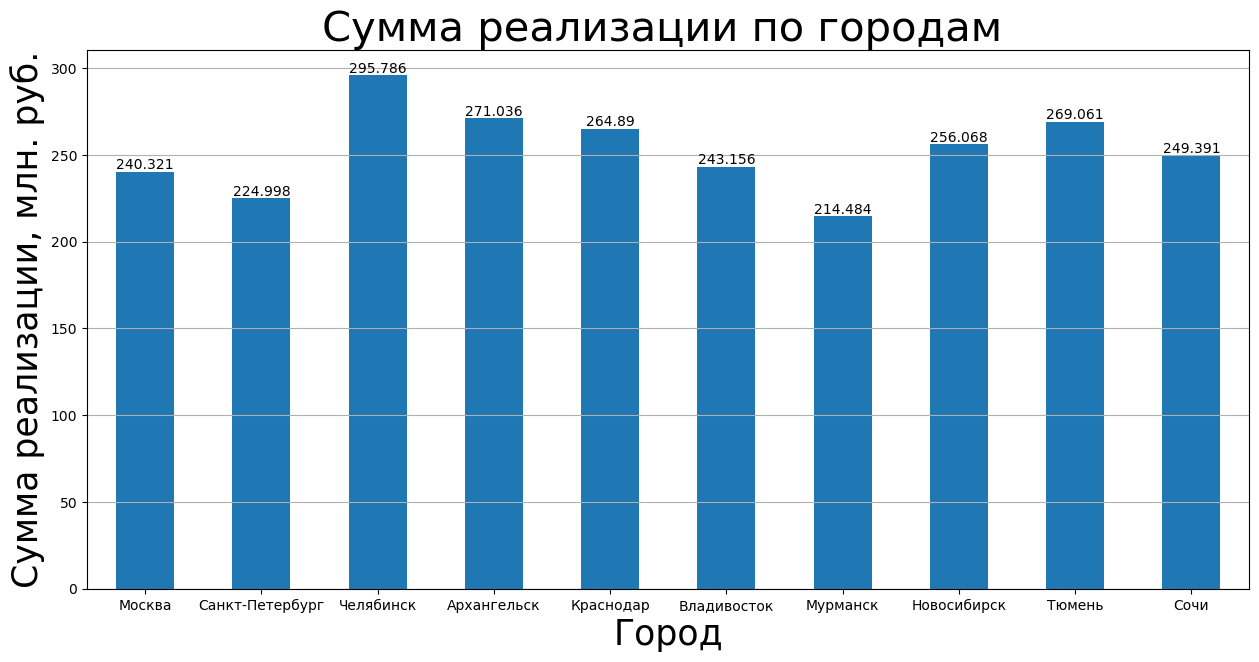

In [580]:
a = new_df.plot(kind = 'bar', figsize = (15,7), legend = False)
a.bar_label (a.containers [ 0 ])
plt.title('Сумма реализации по городам ', fontsize = 30)
plt.ylabel('Сумма реализации, млн. руб.', fontsize = 25)
plt.xlabel('Город', fontsize = 25)
plt.grid(axis = 'y')
plt.xticks(rotation = 0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
